<a href="https://colab.research.google.com/github/SungHunYang/AI_Back/blob/main/03_Linear_Regression(N_Featrues).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

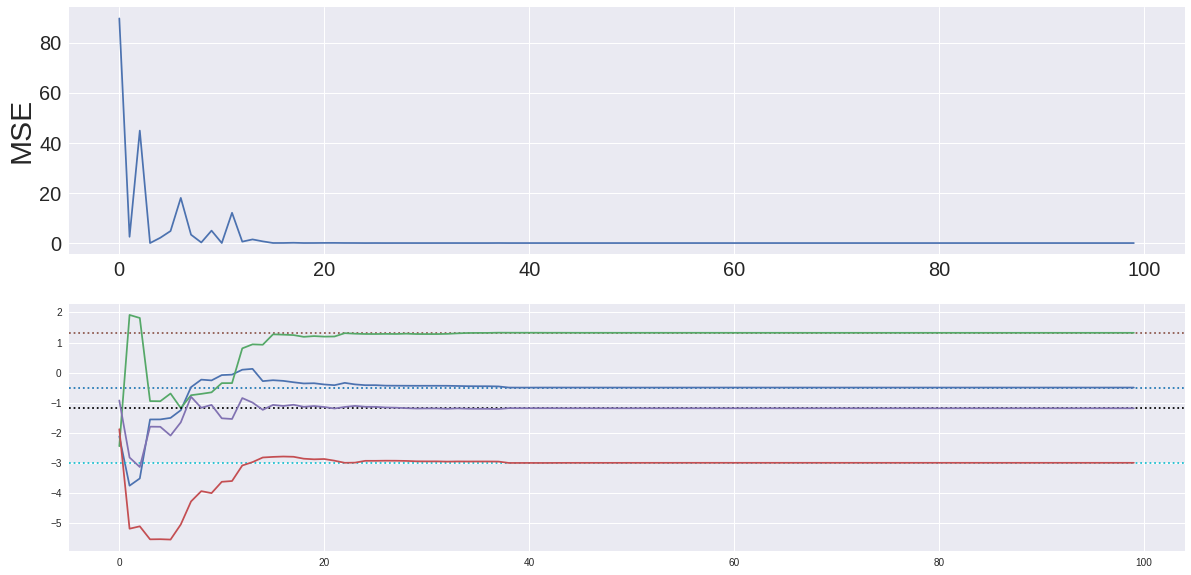

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
n_data, n_feature = 100,3
lr = 0.1
t_w = np.random.uniform(-3,3,(n_feature,1))
t_b = np.random.uniform(-3,3,(1, ))

w = np.random.uniform(-3,3,(n_feature,1))
b = np.random.uniform(-3,3,(1, ))

# generate dataset
x_data = np.random.randn(n_data, n_feature)

y_data = (x_data@t_w)+t_b
J_track = list()
w_track, b_track = list(), list()

for data_idx, (x,y) in enumerate(zip(x_data,y_data)):
  w_track.append(w)
  b_track.append(b)

  # forward propagation
  pred = x @ w + b
  J = (y-pred)**2
  J_track.append(J)

  # jacobians
  dJ_dpred = -2*(y-pred)
  dpred_dw = x.reshape(1,-1)
  dpred_db = 1

  # backpropagation
  dJ_dw = dJ_dpred*dpred_dw
  dJ_db = dJ_dpred*dpred_db

  #parmeter update
  #print(w.shape,dJ_dw.shape)
  #print(b.shape,dJ_db.shape)
  w = w -(lr*dJ_dw.T)
  b = b -(lr*dJ_db)

w_track = np.hstack(w_track)
b_track = np.concatenate(b_track)

# visualize loss
fig, axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE',fontsize=30)
axes[0].tick_params(labelsize=20)

cmap = cm.get_cmap('tab10',lut=n_feature)
for w_idx, (t_w,w) in enumerate(zip(t_w,w_track)):
  axes[1].axhline(y=t_w,color=cmap(w_idx),linestyle=':')
  axes[1].plot(w)
axes[1].axhline(y=t_b,color='black',linestyle=':')
axes[1].plot(b_track)
axes[0].tick_params(labelsize=20)
